In [2]:
import pandas as pd

In [3]:
FOLDER_NAME = 'Data/'

In [4]:
menu_df = pd.read_csv(FOLDER_NAME + 'menu_analysis.csv')
menu_df.head()

,Group,Item_Number,Ingredient,Price,Cost,Points Earn,Points Redeem
0,Primary,Item_1,Chicken,6.5,2.0,65.0,400.0
1,Primary,Item_2,Beef,8.0,2.5,80.0,500.0
2,Primary,Item_3,Shrimp,7.5,3.0,75.0,600.0
3,Primary,Item_4,Tofu,5.5,1.0,55.0,200.0
4,Primary,Item_5,Chickpeas,4.5,0.5,45.0,100.0


In [5]:
customers_df = pd.read_csv(FOLDER_NAME+ 'customers.csv')
customers_df.head()

,Customer_ID,First_Name,Last_Name,Email,Phone,DOB,Gender,Address,City,ST,Zip_Code,Member_Since,Newsletter_Subscription,Feedback_Provided,Communication_Preferences,Data_Sharing_Consent
0,CUST0000,Jason,Silva,wtorres@example.com,549.344.4954x3469,1971-02-01,Female,291 Gonzalez Shoal,Welchmouth,MN,55064,2023-11-17,False,True,NaN,True
1,CUST0001,Kelsey,Griffin,stephaniecraig@example.org,001-556-842-0852x5486,1989-12-05,Female,330 Richard Shores,Lake Paulchester,MN,55489,2020-12-24,False,False,Email,True
2,CUST0002,Jennifer,Miller,elizabeth98@example.com,(662)296-7078x3636,1997-10-16,Male,273 Kimberly Islands Suite 801,Wilsonville,MN,55257,2020-01-21,True,True,NaN,True
3,CUST0003,Kevin,Smith,lori60@example.net,(974)298-9536,1981-12-02,Male,17190 Nicole Ports Suite 554,Walkerfort,MN,55254,2020-06-04,False,True,NaN,True
4,CUST0004,Robert,Murphy,wmiller@example.org,(279)595-9855x12557,1964-02-24,Prefer not to say,7914 Debra Court,Denisetown,MN,56585,2023-05-14,True,False,NaN,True


In [6]:
stores_df = pd.read_csv(FOLDER_NAME+ 'stores.csv')
stores_df.head()

,Store_Name,Store_Number,Address,City,State,Zip
0,Store_1,STR_1,80645 Jesse Plain,St. Paul,MN,61333
1,Store_2,STR_2,7585 Rojas Canyon Apt. 693,St. Paul,MN,22696
2,Store_3,STR_3,2279 Young Harbor Apt. 146,Minneapolis,MN,98151
3,Store_4,STR_4,03518 Megan River Suite 461,Rochester,MN,13864
4,Store_5,STR_5,91129 Gordon Isle,Plymouth,MN,47642


In [7]:
transactions_df = pd.read_csv(FOLDER_NAME+ 'transactions.csv')
transactions_df.head()

,Order_Number,Transaction_Date,Transaction_Time,Store_Number,Customer_ID,Item_Number
0,7830,2023-12-18,09:19:10,STR_3,CUST0024,Item_1
1,5582,2023-10-05,20:36:56,STR_4,CUST0045,Item_7
2,5582,2023-10-05,20:36:56,STR_4,CUST0045,Item_5
3,6591,2024-04-20,02:13:48,STR_4,CUST0005,Item_1
4,6591,2024-04-20,02:13:48,STR_4,CUST0005,Item_1


1. Sales Performance by Item
Visualization: Bar Chart

Objective: Analyze the sales volume or revenue generated by each menu item.
Data Required: menu_df for item details and transactions_df for sales data.
python


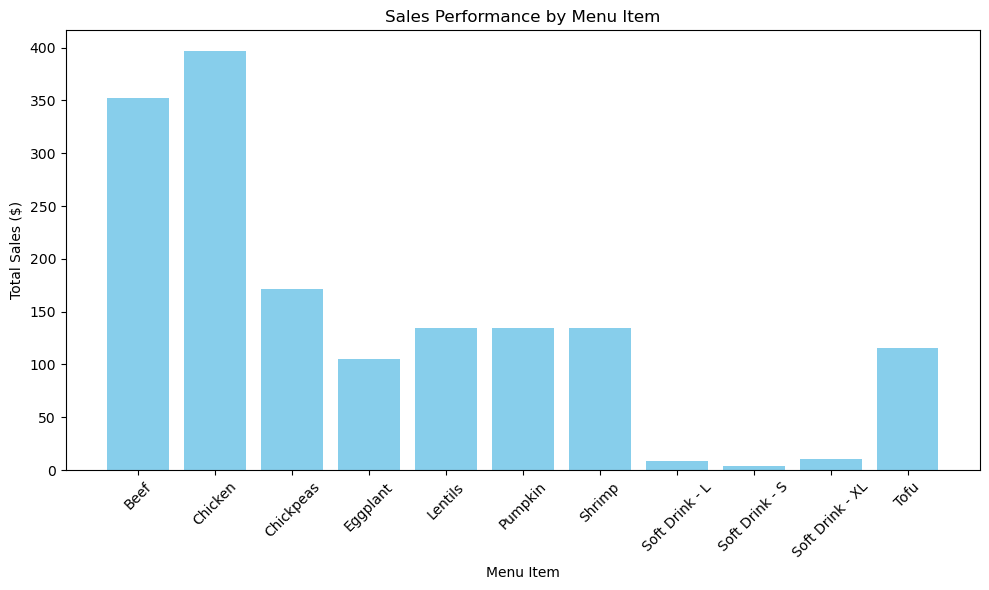

In [8]:
import matplotlib.pyplot as plt

# Merge transactions with menu details
transaction_details = transactions_df.merge(menu_df, left_on='Item_Number', right_on='Item_Number')

# Calculate sales per item
sales_per_item = transaction_details.groupby('Ingredient').agg({'Price': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sales_per_item['Ingredient'], sales_per_item['Price'], color='skyblue')
plt.xlabel('Menu Item')
plt.ylabel('Total Sales ($)')
plt.title('Sales Performance by Menu Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Customer Demographics Distribution
Visualization: Pie Chart

Objective: Understand the distribution of customers by gender.
Data Required: customers_df.


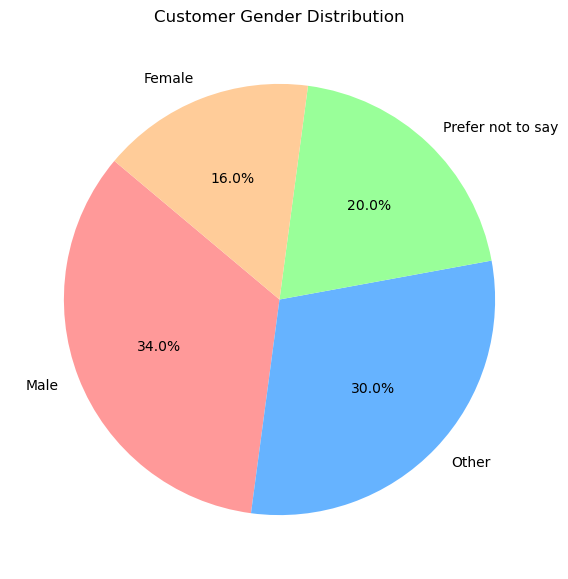

In [9]:
# Count by gender
gender_distribution = customers_df['Gender'].value_counts()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Gender Distribution')
plt.show()


3. Sales Trends Over Time
Visualization: Line Graph

Objective: Identify trends in sales over time.
Data Required: transactions_df merged with menu_df for price data.

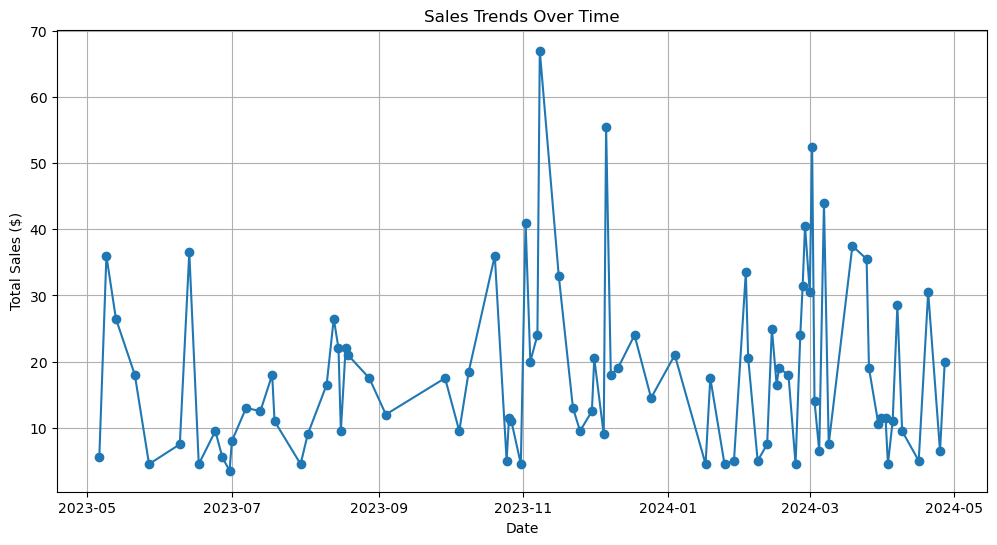

In [10]:
# Merge transactions with menu details to include item prices
merged_df = pd.merge(transactions_df, menu_df, on="Item_Number")

# Convert transaction_date to datetime
merged_df["Transaction_Date"] = pd.to_datetime(merged_df["Transaction_Date"])

# Aggregate sales over time
sales_over_time = merged_df.groupby("Transaction_Date")["Price"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time["Transaction_Date"], sales_over_time["Price"], marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trends Over Time")
plt.grid(True)
plt.show()

4. Store Performance
Visualization: Horizontal Bar Chart

Objective: Compare sales performance across different store locations.
Data Required: transactions_df and stores_df.

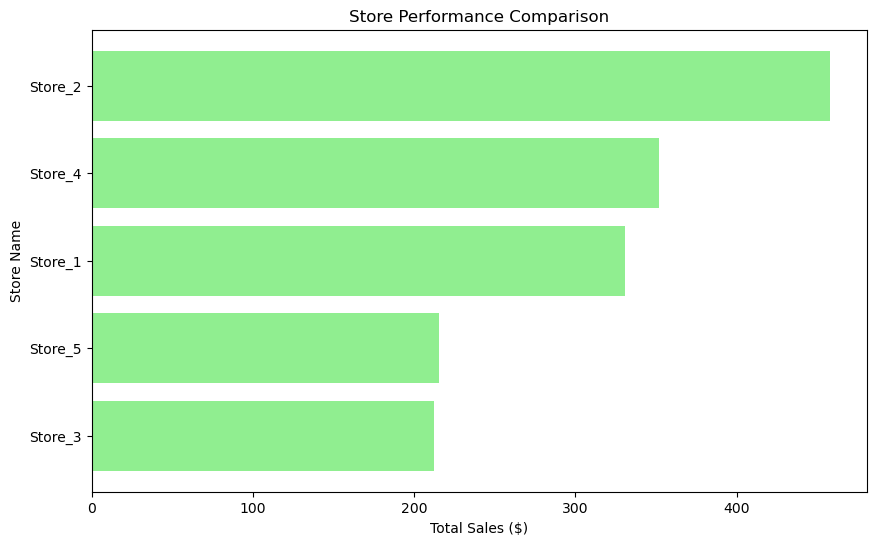

In [12]:
# Merge transactions with menu data to get the prices
transaction_menu_details = transactions_df.merge(menu_df, left_on='Item_Number', right_on='Item_Number')

# Now merge with store details
transaction_store_details = transaction_menu_details.merge(stores_df, on='Store_Number')

# Aggregate sales by store
store_sales = transaction_store_details.groupby('Store_Name')['Price'].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(store_sales.index, store_sales, color='lightgreen')
plt.xlabel('Total Sales ($)')
plt.ylabel('Store Name')
plt.title('Store Performance Comparison')
plt.show()


In [15]:
# Merge transactions with menu to get price and cost information
transactions_with_menu = pd.merge(transactions_df, menu_df, left_on='Item_Number', right_on='Item_Number', how='left')

# Calculate net value for each transaction
transactions_with_menu['Net_Value'] = transactions_with_menu['Price'] - transactions_with_menu['Cost']

# Calculate total net value per item per store
grouped = transactions_with_menu.groupby(['Store_Number', 'Item_Number'])['Net_Value'].sum().reset_index()

# Find the item with the highest net value in each store
idx = grouped.groupby(['Store_Number'])['Net_Value'].transform(max) == grouped['Net_Value']
highest_net_value_items = grouped[idx]

# Merge with stores_df to get store names if needed
highest_net_value_items = pd.merge(highest_net_value_items, stores_df, on='Store_Number', how='left')

# Print or return the results
print(highest_net_value_items)

  Store_Number Item_Number  Net_Value Store_Name                      Address  \
0        STR_1      Item_1       72.0    Store_1            80645 Jesse Plain   
1        STR_2      Item_2       88.0    Store_2   7585 Rojas Canyon Apt. 693   
2        STR_3      Item_1       40.5    Store_3   2279 Young Harbor Apt. 146   
3        STR_4      Item_1       63.0    Store_4  03518 Megan River Suite 461   
4        STR_5      Item_2       33.0    Store_5            91129 Gordon Isle   

          City State    Zip  
0     St. Paul    MN  61333  
1     St. Paul    MN  22696  
2  Minneapolis    MN  98151  
3    Rochester    MN  13864  
4     Plymouth    MN  47642  


In [16]:
import pandas as pd

# Assuming transactions_df, menu_df, and stores_df are already loaded correctly

# Merge transactions with menu to get price and cost information
transactions_with_menu = pd.merge(transactions_df, menu_df, left_on='Item_Number', right_on='Item_Number', how='left')

# Calculate net value per item transaction
transactions_with_menu['Net_Value'] = (transactions_with_menu['Price'] - transactions_with_menu['Cost'])

# Calculate total net value per item per store
# This includes counting the number of times each item is sold in each store
transactions_with_menu['Count'] = 1  # Initialize a count column to aggregate by count later
grouped = transactions_with_menu.groupby(['Store_Number', 'Item_Number']).agg({
    'Net_Value': 'sum',
    'Count': 'sum'
}).reset_index()

# Calculate total net contribution of each item per store
grouped['Total_Net_Value'] = grouped['Net_Value'] * grouped['Count']

# Find the item with the highest net value in each store
idx = grouped.groupby(['Store_Number'])['Total_Net_Value'].transform(max) == grouped['Total_Net_Value']
highest_net_value_items = grouped[idx]

# Merge with stores_df to get store names if needed
highest_net_value_items = pd.merge(highest_net_value_items, stores_df, on='Store_Number', how='left')

# Print or return the results
print(highest_net_value_items[['Store_Name', 'Item_Number', 'Total_Net_Value']])


  Store_Name Item_Number  Total_Net_Value
0    Store_1      Item_1           1152.0
1    Store_2      Item_2           1408.0
2    Store_3      Item_1            364.5
3    Store_4      Item_1            882.0
4    Store_5      Item_2            198.0


In [17]:
import pandas as pd

# Assuming transactions_df, menu_df, and stores_df are already loaded correctly

# Merge transactions with menu to get price and cost information
transactions_with_menu = pd.merge(transactions_df, menu_df, left_on='Item_Number', right_on='Item_Number', how='left')

# Calculate net value per item transaction
transactions_with_menu['Net_Value'] = (transactions_with_menu['Price'] - transactions_with_menu['Cost'])

# Calculate total net value per item per store
# This includes counting the number of times each item is sold in each store
transactions_with_menu['Count'] = 1  # Initialize a count column to aggregate by count later
grouped = transactions_with_menu.groupby(['Store_Number', 'Item_Number']).agg({
    'Net_Value': 'sum',
    'Count': 'sum'
}).reset_index()

# Calculate total net contribution of each item per store
grouped['Total_Net_Value'] = grouped['Net_Value'] * grouped['Count']

# Find the item with the highest net value in each store
idx = grouped.groupby(['Store_Number'])['Total_Net_Value'].transform(max) == grouped['Total_Net_Value']
highest_net_value_items = grouped[idx]

# Merge with menu_df to get item names
highest_net_value_items = pd.merge(highest_net_value_items, menu_df[['Item_Number', 'Ingredient']], on='Item_Number', how='left')

# Merge with stores_df to get store names
highest_net_value_items = pd.merge(highest_net_value_items, stores_df, on='Store_Number', how='left')

# Selecting relevant columns for clarity
highest_net_value_items = highest_net_value_items[['Store_Name', 'Item_Number', 'Ingredient', 'Total_Net_Value']]

# Print or return the results
print(highest_net_value_items)


  Store_Name Item_Number Ingredient  Total_Net_Value
0    Store_1      Item_1    Chicken           1152.0
1    Store_2      Item_2       Beef           1408.0
2    Store_3      Item_1    Chicken            364.5
3    Store_4      Item_1    Chicken            882.0
4    Store_5      Item_2       Beef            198.0
